## Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [46]:
data = pd.read_csv("mobile_price_recom.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## Pre-Processing

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [48]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Categorical Data

In [49]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

### Missing Values

In [50]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Outliers

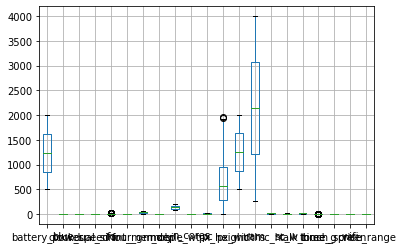

In [51]:
data.boxplot()

### Duplicated Data

In [52]:
data.duplicated().sum()

0

## X and Y

In [53]:
X = data.drop('price_range'  ,axis = 1)
columns = X.columns
Y = data['price_range']

## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [55]:
df = pd.DataFrame(X_scaled, columns = columns)
X_scaled1 = df
X_scaled1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


## Feature Selection with Embeded Method

## Spiliting Train and Test Data

In [56]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 101)
X_train_scaled , X_test_scaled , Y_train_scaled , Y_test_scaled = train_test_split(X_scaled1 , Y , test_size = 0.3 , random_state = 101) # with scaled data

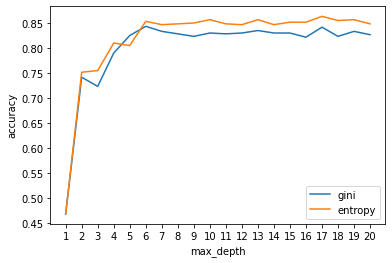

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = []
acc_gini = []
acc_entropy = [] 

for i in range(1,21):
  dtree = DecisionTreeClassifier(criterion = "gini", max_depth = i)
  dtree.fit(X_train, Y_train)
  pred = dtree.predict(X_test)
  acc_gini.append(accuracy_score(Y_test, pred))

  dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
  dtree.fit(X_train, Y_train)
  pred = dtree.predict(X_test)
  acc_entropy.append(accuracy_score(Y_test, pred))
  max_depth.append(i)

d = pd.DataFrame({"acc_gini" : pd.Series(acc_gini),
                  "acc_entropy" : pd.Series(acc_entropy),
                  "max_depth" : pd.Series(max_depth)})

plt.plot("max_depth", "acc_gini", data = d, label = "gini")
plt.plot("max_depth", "acc_entropy", data = d, label = "entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.xticks([j for j in range(1,21)])
plt.legend()
plt.show()

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = 7, random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

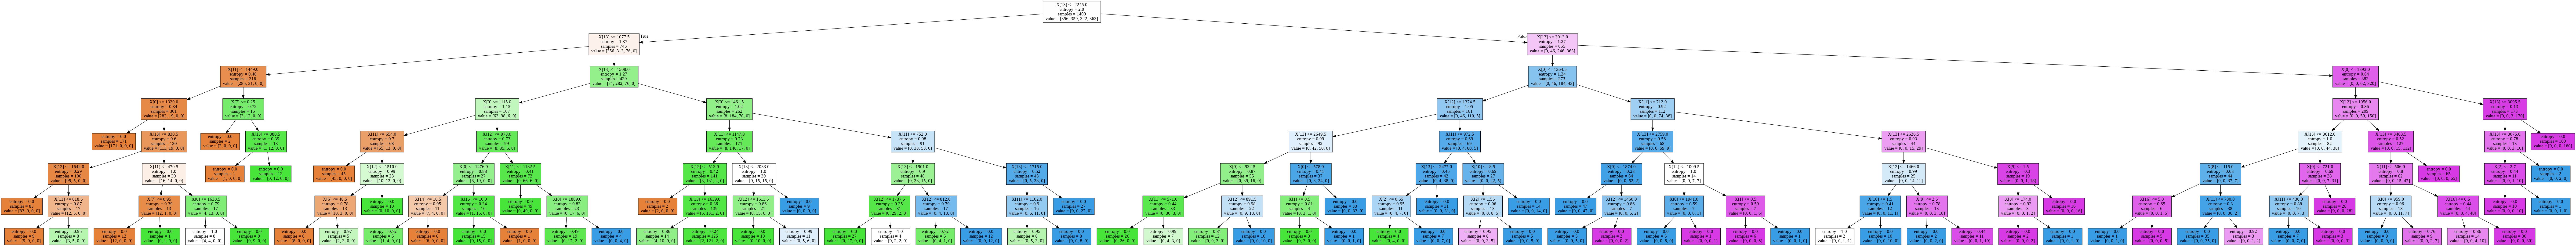

In [59]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data, filled = True, precision = 2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

features 0 : "battery_power" , 6 :"int_memory" , 7 : "m_dep" , 11 : "px_height" , 12 : "px_width" , 13 : "ram"  , 14 : "sc_h" , 15 : "sc_w" are selected  

In [60]:
selected_features = X.iloc[:,[0,6,7,11,12,13,15]]
selected_features


,battery_power,int_memory,m_dep,px_height,px_width,ram,sc_w
0,842,7,0.6,20,756,2549,7
1,1021,53,0.7,905,1988,2631,3
2,563,41,0.9,1263,1716,2603,2
3,615,10,0.8,1216,1786,2769,8
4,1821,44,0.6,1208,1212,1411,2
...,...,...,...,...,...,...,...
1995,794,2,0.8,1222,1890,668,4
1996,1965,39,0.2,915,1965,2032,10
1997,1911,36,0.7,868,1632,3057,1
1998,1512,46,0.1,336,670,869,10


In [61]:
df = selected_features
df["price_range"] = data.iloc[:,20]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,battery_power,int_memory,m_dep,px_height,px_width,ram,sc_w,price_range
0,842,7,0.6,20,756,2549,7,1
1,1021,53,0.7,905,1988,2631,3,2
2,563,41,0.9,1263,1716,2603,2,2
3,615,10,0.8,1216,1786,2769,8,2
4,1821,44,0.6,1208,1212,1411,2,1
...,...,...,...,...,...,...,...,...
1995,794,2,0.8,1222,1890,668,4,0
1996,1965,39,0.2,915,1965,2032,10,2
1997,1911,36,0.7,868,1632,3057,1,3
1998,1512,46,0.1,336,670,869,10,0


## K Nearest Neighbors (KNN) Model with selected features

using Elbow Method For optimum value of K

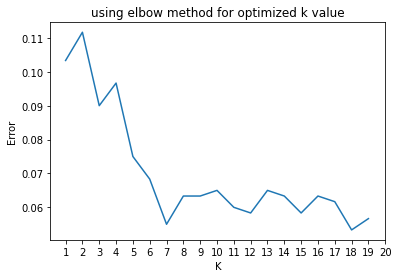

In [62]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(selected_features , Y , test_size = 0.3, random_state = 0)


from sklearn.neighbors import KNeighborsClassifier
Error = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train ,Y1_train)
    pred_i = knn.predict(X1_test)
    Error.append(np.mean(pred_i != Y1_test)) 
plt.plot(range(1, 20), Error)
plt.title("using elbow method for optimized k value")
plt.xlabel("K")
plt.ylabel("Error")
plt.xticks([j for j in range(1,21)])
plt.show() 

Training the Model

In [63]:
knn = KNeighborsClassifier(n_neighbors = 5 , algorithm = "ball_tree")
knn.fit(X1_train ,Y1_train)
distances, indices = knn.kneighbors(X1_train)
print(indices)

[[   0  662  641  635  583]
 [   1  676  304  106 1259]
 [   2  623 1318 1292  486]
 ...
 [1397    4  407  316 1079]
 [1398  276  533  561 1393]
 [1399  547  846  384  186]]


In [64]:
df.iloc[[0,662,641,635,583],:]

,battery_power,int_memory,m_dep,px_height,px_width,ram,sc_w,price_range
0,842,7,0.6,20,756,2549,7,1
662,1695,46,0.7,1791,1898,446,13,1
641,518,3,0.1,437,1947,2832,0,2
635,701,15,0.5,1002,1256,1756,3,1
583,1813,5,0.2,338,1306,759,3,0


In [65]:
recom_distances , recom_indices = nbrs.kneighbors(X1_test)
recom_indices

array([[ 496,  283,  388,  947,  200],
       [1353, 1022,  447,  424,  599],
       [1358,  788,  302, 1058,  934],
       ...,
       [ 538,  687,  887,  619, 1081],
       [ 472,  869, 1072,  255,  500],
       [ 869,  544,   72, 1130,  446]])

In [66]:
recom_df = pd.DataFrame(recom_indices)
recom_df

,0,1,2,3,4
0,496,283,388,947,200
1,1353,1022,447,424,599
2,1358,788,302,1058,934
3,296,284,1063,1269,693
4,364,1090,779,46,62
...,...,...,...,...,...
595,449,1235,1151,988,428
596,65,513,379,1262,122
597,538,687,887,619,1081
598,472,869,1072,255,500


In [67]:
df.iloc[recom_df.iloc[0,:],:]

,battery_power,int_memory,m_dep,px_height,px_width,ram,sc_w,price_range
496,1554,5,1.0,395,1579,3635,4,3
283,659,6,0.5,1054,1929,2044,5,1
388,1117,12,0.6,798,817,2895,6,2
947,907,42,0.2,171,507,584,9,0
200,1703,22,0.6,286,1235,1046,4,0


# Evaluation Model

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

predicted_price = knn.predict(X1_test)
print(classification_report(Y1_test , predicted_price))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       151
           1       0.92      0.90      0.91       135
           2       0.92      0.87      0.89       151
           3       0.92      0.95      0.94       163

    accuracy                           0.93       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.93      0.92       600



In [69]:
print(confusion_matrix(Y1_test , predicted_price))

[[148   3   0   0]
 [ 10 121   4   0]
 [  0   7 131  13]
 [  0   0   8 155]]


In [70]:
print(accuracy_score(Y1_test, predicted_price))

0.925


In [71]:
knn.score(X1_test , Y1_test)

0.925

In [72]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y1_test, predicted_price))
print('MSE:', metrics.mean_squared_error(Y1_test, predicted_price))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y1_test, predicted_price)))

MAE: 0.075
MSE: 0.075
RMSE: 0.27386127875258304


# Work with Scaled Data :

Training with scaled data :

In [73]:
knn.fit(X_train_scaled ,Y_train_scaled)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
knn.score(X_test_scaled , Y_test_scaled)

0.4633333333333333

Predict with scaled data :

In [75]:
predicted_price = knn.predict(X_test)
print(classification_report(Y_test , predicted_price))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.00      0.00      0.00       141
           2       0.00      0.00      0.00       178
           3       0.23      1.00      0.37       137

    accuracy                           0.23       600
   macro avg       0.06      0.25      0.09       600
weighted avg       0.05      0.23      0.09       600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
